<script async src="https://www.googletagmanager.com/gtag/js?id=UA-59152712-8"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-59152712-8');
</script>

# Start-to-Finish Example: Setting up Exact Initial Data for Einstein's Equations, in Curvilinear Coordinates
## Authors: Brandon Clark, George Vopal, and Zach Etienne

## This module sets up initial data for a specified exact solution written in terms of ADM variables, using the [*Exact* ADM Spherical to BSSN Curvilinear initial data module](../edit/BSSN/ADM_Exact_Spherical_or_Cartesian_to_BSSNCurvilinear.py).

**Module Status:** <font color='green'><b> Validated </b></font>

**Validation Notes:** This module has been validated, confirming that all initial data sets exhibit convergence to zero of the Hamiltonian and momentum constraints at the expected rate or better.

### NRPy+ Source Code for this module:
* [BSSN/ADM_Exact_Spherical_or_Cartesian_to_BSSNCurvilinear.py](../edit/BSSN/ADM_Exact_Spherical_or_Cartesian_to_BSSNCurvilinear.py); [\[**tutorial**\]](Tutorial-ADM_Initial_Data-Converting_Exact_ADM_Spherical_or_Cartesian_to_BSSNCurvilinear.ipynb): *Exact* Spherical ADM$\to$Curvilinear BSSN converter function
* [BSSN/BSSN_constraints.py](../edit/BSSN/BSSN_constraints.py); [\[**tutorial**\]](Tutorial-BSSN_constraints.ipynb): Hamiltonian & momentum constraints in BSSN curvilinear basis/coordinates

## Introduction:
Here we use NRPy+ to generate a C code confirming that specified *exact* initial data satisfy Einstein's equations of general relativity. The following exact initial data types are supported:

* Shifted Kerr-Schild spinning black hole initial data
* "Static" Trumpet black hole initial data
* Brill-Lindquist two black hole initial data
* UIUC black hole initial data

<a id='toc'></a>

# Table of Contents
$$\label{toc}$$

This module is organized as follows

0. [Preliminaries](#prelim): The Choices for Initial Data
    1. [Choice 1](#sks): Shifted Kerr-Schild spinning black hole initial data
    1. [Choice 2](#st):  "Static" Trumpet black hole initial data
    1. [Choice 3](#bl): Brill-Lindquist two black hole initial data
    1. [Choice 4](#uiuc): UIUC black hole initial data
1. [Step 2](#initializenrpy): Set core NRPy+ parameters for numerical grids and reference metric
1. [Step 3](#adm_id): Import Black Hole ADM initial data C function from NRPy+ module
1. [Step 4](#validate): Validating that the black hole initial data satisfy the Hamiltonian constraint
    1. [Step 4.a](#ham_const_output): Output C code for evaluating the Hamiltonian and Momentum constraint violation
    1. [Step 4.b](#apply_bcs): Apply singular, curvilinear coordinate boundary conditions
    1. [Step 4.c](#enforce3metric): Enforce conformal 3-metric $\det{\bar{\gamma}_{ij}}=\det{\hat{\gamma}_{ij}}$ constraint
1. [Step 5](#mainc): `Initial_Data.c`: The Main C Code
1. [Step 6](#plot): Plotting the initial data
1. [Step 7](#convergence): Validation: Convergence of numerical errors (Hamiltonian constraint violation) to zero
1. [Step 8](#latex_pdf_output): Output this module to $\LaTeX$-formatted PDF file

<a id='prelim'></a>

# Preliminaries: The Choices for Initial Data
$$\label{prelim}$$

<a id='sks'></a>

## Shifted Kerr-Schild spinning black hole initial data \[Back to [top](#toc)\]
$$\label{sks}$$

Here we use NRPy+ to generate initial data for a spinning black hole.

Shifted Kerr-Schild spinning black hole initial data has been <font color='green'><b> validated </b></font> to exhibit convergence to zero of both the Hamiltonian and momentum constraint violations at the expected order to the exact solution.

**NRPy+ Source Code:**
* [BSSN/ShiftedKerrSchild.py](../edit/BSSN/ShiftedKerrSchild.py); [\[**tutorial**\]](Tutorial-ADM_Initial_Data-ShiftedKerrSchild.ipynb)

The [BSSN.ShiftedKerrSchild](../edit/BSSN/ShiftedKerrSchild.py) NRPy+ module does the following:

1. Set up shifted Kerr-Schild initial data, represented by [ADM](https://en.wikipedia.org/wiki/ADM_formalism) quantities in the **Spherical basis**, as [documented here](Tutorial-ADM_Initial_Data-ShiftedKerrSchild.ipynb). 
1. Convert the exact ADM **Spherical quantities** to **BSSN quantities in the desired Curvilinear basis** (set by `reference_metric::CoordSystem`), as [documented here](Tutorial-ADM_Initial_Data-Converting_Numerical_ADM_Spherical_or_Cartesian_to_BSSNCurvilinear.ipynb).
1. Sets up the standardized C function for setting all BSSN Curvilinear gridfunctions in a pointwise fashion, as [written here](../edit/BSSN/BSSN_ID_function_string.py), and returns the C function as a Python string.

<a id='st'></a>

## "Static" Trumpet black hole initial data \[Back to [top](#toc)\]
$$\label{st}$$

Here we use NRPy+ to generate initial data for a single trumpet black hole ([Dennison & Baumgarte, PRD ???](https://arxiv.org/abs/??)).

"Static" Trumpet black hole initial data has been <font color='green'><b> validated </b></font> to exhibit convergence to zero of the Hamiltonian constraint violation at the expected order to the exact solution. It was carefully ported from the [original NRPy+ code](https://bitbucket.org/zach_etienne/nrpy).

**NRPy+ Source Code:**
* [BSSN/StaticTrumpet.py](../edit/BSSN/StaticTrumpet.py); [\[**tutorial**\]](Tutorial-ADM_Initial_Data-StaticTrumpet.ipynb)

The [BSSN.StaticTrumpet](../edit/BSSN/StaticTrumpet.py) NRPy+ module does the following:

1. Set up static trumpet black hole initial data, represented by [ADM](https://en.wikipedia.org/wiki/ADM_formalism) quantities in the **Spherical basis**, as [documented here](Tutorial-ADM_Initial_Data-StaticTrumpetBlackHoleipynb). 
1. Convert the exact ADM **Spherical quantities** to **BSSN quantities in the desired Curvilinear basis** (set by `reference_metric::CoordSystem`), as [documented here](Tutorial-ADM_Initial_Data-Converting_Numerical_ADM_Spherical_or_Cartesian_to_BSSNCurvilinear.ipynb).
1. Sets up the standardized C function for setting all BSSN Curvilinear gridfunctions in a pointwise fashion, as [written here](../edit/BSSN/BSSN_ID_function_string.py), and returns the C function as a Python string.

<a id='bl'></a>

## Brill-Lindquist initial data \[Back to [top](#toc)\]
$$\label{bl}$$

Here we use NRPy+ to generate initial data for two black holes (Brill-Lindquist, [Brill & Lindquist, Phys. Rev. 131, 471, 1963](https://journals.aps.org/pr/abstract/10.1103/PhysRev.131.471); see also Eq. 1 of [Brandt & Brügmann, arXiv:gr-qc/9711015v1](https://arxiv.org/pdf/gr-qc/9711015v1.pdf)).

[//]: # " and then we use it to generate the RHS expressions for [Method of Lines](https://reference.wolfram.com/language/tutorial/NDSolveMethodOfLines.html) time integration based on the [explicit Runge-Kutta fourth-order scheme](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) (RK4)."

Brill-Lindquist initial data has been <font color='green'><b> validated </b></font> to exhibit convergence to zero of the Hamiltonian constraint violation at the expected order to the exact solution, and all quantities have been validated against the [original SENR code](https://bitbucket.org/zach_etienne/nrpy).

**NRPy+ Source Code:**
* [BSSN/BrillLindquist.py](../edit/BSSN/BrillLindquist.py); [\[**tutorial**\]](Tutorial-ADM_Initial_Data-Brill-Lindquist.ipynb)
* [BSSN/BSSN_ID_function_string.py](../edit/BSSN/BSSN_ID_function_string.py)

The [BSSN.BrillLindquist](../edit/BSSN/BrillLindquist.py) NRPy+ module does the following:

1. Set up Brill-Lindquist initial data [ADM](https://en.wikipedia.org/wiki/ADM_formalism) quantities in the **Cartesian basis**, as [documented here](Tutorial-ADM_Initial_Data-Brill-Lindquist.ipynb). 
1. Convert the ADM **Cartesian quantities** to **BSSN quantities in the desired Curvilinear basis** (set by `reference_metric::CoordSystem`), as [documented here](Tutorial-ADM_Initial_Data-Converting_ADMCartesian_to_BSSNCurvilinear.ipynb).
1. Sets up the standardized C function for setting all BSSN Curvilinear gridfunctions in a pointwise fashion, as [written here](../edit/BSSN/BSSN_ID_function_string.py), and returns the C function as a Python string.

<a id='uiuc'></a>

## UIUC black hole initial data \[Back to [top](#toc)\]
$$\label{uiuc}$$ 

UIUC black hole initial data has been <font color='green'><b> validated </b></font> to exhibit convergence to zero of the Hamiltonian constraint violation at the expected order to the exact solution, and all quantities have been validated against the [original SENR code](https://bitbucket.org/zach_etienne/nrpy).

**NRPy+ Source Code:**
* [BSSN/UIUCBlackHole.py](../edit/BSSN/UIUCBlackHole.py); [\[**tutorial**\]](Tutorial-ADM_Initial_Data-UIUCBlackHole.ipynb)

The [BSSN.UIUCBlackHole](../edit/BSSN/UIUCBlackHole.py) NRPy+ module does the following:

1. Set up UIUC black hole initial data, represented by [ADM](https://en.wikipedia.org/wiki/ADM_formalism) quantities in the **Spherical basis**, as [documented here](Tutorial-ADM_Initial_Data-UIUCBlackHoleipynb). 
1. Convert the numerical ADM **Spherical quantities** to **BSSN quantities in the desired Curvilinear basis** (set by `reference_metric::CoordSystem`), as [documented here](Tutorial-ADM_Initial_Data-Converting_Numerical_ADM_Spherical_or_Cartesian_to_BSSNCurvilinear.ipynb).
1. Sets up the standardized C function for setting all BSSN Curvilinear gridfunctions in a pointwise fashion, as [written here](../edit/BSSN/BSSN_ID_function_string.py), and returns the C function as a Python string.

<a id='-pickid'></a>

# Step 1: Specify the Initial Data to Test  \[Back to [top](#toc)\]
$$\label{pickid}$$

Here you have a choice for which initial data you would like to import and test for convergence. The following is a list of the currently compatible `initial_data_string` options for you to choose from.

* `"Shifted KerrSchild"`
* `"Static Trumpet"`
* `"Brill-Lindquist"`
* `"UIUC"`

In [1]:
import collections

#################
# For the User: Choose initial data, default is Shifted KerrSchild.
#               You are also encouraged to adjust any of the 
#               DestGridCoordSystem, freeparams, or EnableMomentum parameters! 
#               NOTE: Only DestGridCoordSystem == Spherical or SinhSpherical
#                     currently work out of the box; additional modifications
#                     will likely be necessary for other CoordSystems.
#################
initial_data_string = "Shifted KerrSchild" # "UIUC"


dictID = {}
IDmod_retfunc = collections.namedtuple('IDmod_retfunc', 'modulename functionname DestGridCoordSystem freeparams EnableMomentum')

dictID['Shifted KerrSchild']  = IDmod_retfunc(
    modulename = "BSSN.ShiftedKerrSchild", functionname = "ShiftedKerrSchild", 
    DestGridCoordSystem = "Spherical",
    freeparams = ["const REAL M   = 1.0;", "const REAL a   = 0.9;", "const REAL r0 = 1.0;"], 
    EnableMomentum = True)

dictID['Static Trumpet'] = IDmod_retfunc(
    modulename = "BSSN.StaticTrumpet", functionname = "StaticTrumpet", 
    DestGridCoordSystem = "Spherical",
    freeparams = ["const REAL M   = 1.0;"], 
    EnableMomentum = False)

dictID['Brill-Lindquist'] = IDmod_retfunc(
    modulename = "BSSN.BrillLindquist", functionname = "BrillLindquist", 
    DestGridCoordSystem = "Spherical",
    freeparams = ["const REAL BH1_posn_x =-1.0,BH1_posn_y = 0.0,BH1_posn_z = 0.0;",
                  "const REAL BH2_posn_x = 1.0,BH2_posn_y = 0.0,BH2_posn_z = 0.0;", "const REAL BH1_mass = 0.5,BH2_mass = 0.5;"], 
    EnableMomentum = False)

dictID['UIUC'] = IDmod_retfunc(modulename = "BSSN.UIUCBlackHole", functionname = "UIUCBlackHole", 
    DestGridCoordSystem = "SinhSpherical",
    freeparams = ["const REAL M   = 1.0;", "const REAL chi = 0.99;"], 
    EnableMomentum = True)

# Output the free parameters associated with the initial data
with open("BSSN/freeparams.h", "w") as file:
    for p in dictID[initial_data_string].freeparams:
        file.write(p+"\n")

<a id='initializenrpy'></a>

# Step 2: Set up the needed NRPy+ infrastructure and declare core gridfunctions \[Back to [top](#toc)\]
$$\label{initializenrpy}$$

We will import the core modules of NRPy that we will need and specify the main gridfunctions we will need.

In [2]:
# We we import needed core NRPy+ modules
from outputC import *
import NRPy_param_funcs as par
import grid as gri
import loop as lp
import indexedexp as ixp
import finite_difference as fin
import reference_metric as rfm
import importlib

# Set spatial dimension (must be 3 for BSSN)
DIM = 3
par.set_parval_from_str("grid::DIM",DIM)

# Then we set the coordinate system for the numerical grid
par.set_parval_from_str("reference_metric::CoordSystem", dictID[initial_data_string].DestGridCoordSystem)
rfm.reference_metric() # Create ReU, ReDD needed for rescaling B-L initial data, generating BSSN RHSs, etc.

#################
# Next output C headers related to the numerical grids we just set up:
#################

# First output the coordinate bounds xxmin[] and xxmax[]:
with open("BSSN/xxminmax.h", "w") as file:
    file.write("const REAL xxmin[3] = {"+str(rfm.xxmin[0])+","+str(rfm.xxmin[1])+","+str(rfm.xxmin[2])+"};\n")
    file.write("const REAL xxmax[3] = {"+str(rfm.xxmax[0])+","+str(rfm.xxmax[1])+","+str(rfm.xxmax[2])+"};\n")

# Generic coordinate NRPy+ file output, Part 2: output the conversion from (x0,x1,x2) to Cartesian (x,y,z)
outputC([rfm.xxCart[0],rfm.xxCart[1],rfm.xxCart[2]],["xCart[0]","xCart[1]","xCart[2]"],
        "BSSN/xxCart.h")

gri.glb_gridfcs_list = []
H = gri.register_gridfunctions("AUX","H")

# Register the Momentum Constraint as a gridfunction, to be used later
MU = ixp.register_gridfunctions_for_single_rank1("AUX", "MU")

Wrote to file "BSSN/xxCart.h"


<a id='adm_id'></a>

# Step 3: Import Black Hole ADM initial data C function from NRPy+ module \[Back to [top](#toc)\]
$$\label{adm_id}$$

In [3]:
# Import Black Hole initial data

IDmodule = importlib.import_module(dictID[initial_data_string].modulename)
IDfunc = getattr(IDmodule, dictID[initial_data_string].functionname)
returnfunction = IDfunc()

# Now output the initial data to file:
#header_string = dictID[initial_data_string].modulename.replace(".", "/")+".h"
with open("BSSN/InitialData.h", "w") as file:
    file.write(IDmodule.returnfunction)

<a id='validate'></a>

# Step 4: Validating that the black hole initial data satisfy the Hamiltonian constraint \[Back to [top](#toc)\]
$$\label{validate}$$

We will validate that the black hole initial data satisfy the Hamiltonian constraint, modulo numerical finite differencing error.

<a id='ham_const_output'></a>

## Step 4.a:  Output C code for evaluating the Hamiltonian and Momentum constraint violation \[Back to [top](#toc)\]
$$\label{ham_const_output}$$

First output C code for evaluating the Hamiltonian constraint violation. For the initial data where `EnableMomentum = True` we must also output C code for evaluating the Momentum constraint violation.

In [4]:
import BSSN.BSSN_constraints as bssncon
bssncon.output_C__Hamiltonian_h(add_T4UUmunu_source_terms=False)
bssncon.output_C__MomentumConstraint_h(add_T4UUmunu_source_terms=False)

Generating optimized C code for Hamiltonian constraint. May take a while, depending on CoordSystem.
Finished in 8.84547495842 seconds.
Output C implementation of Hamiltonian constraint to BSSN/Hamiltonian.h
Generating optimized C code for Momentum constraint. May take a while, depending on CoordSystem.
Finished in 1.27401709557 seconds.
Output C implementation of Momentum constraint to BSSN/MomentumConstraint.h


<a id='apply_bcs'></a>

## Step 4.b: Apply singular, curvilinear coordinate boundary conditions \[Back to [top](#toc)\]
$$\label{apply_bcs}$$

Next apply singular, curvilinear coordinate boundary conditions [as documented in the corresponding NRPy+ tutorial module](Tutorial-Start_to_Finish-Curvilinear_BCs.ipynb)

In [5]:
import CurviBoundaryConditions.CurviBoundaryConditions as cbcs
cbcs.Set_up_CurviBoundaryConditions()

Wrote to file "CurviBoundaryConditions/gridfunction_defines.h"
Wrote to file "CurviBoundaryConditions/set_parity_conditions.h"
Wrote to file "CurviBoundaryConditions/xxCart.h"
Wrote to file "CurviBoundaryConditions/xxminmax.h"
Wrote to file "CurviBoundaryConditions/Cart_to_xx.h"


<a id='enforce3metric'></a>

## Step 4.c: Enforce conformal 3-metric $\det{\bar{\gamma}_{ij}}=\det{\hat{\gamma}_{ij}}$ constraint
$$\label{enforce3metric}$$

Then enforce conformal 3-metric $\det{\bar{\gamma}_{ij}}=\det{\hat{\gamma}_{ij}}$ constraint (Eq. 53 of [Ruchlin, Etienne, and Baumgarte (2018)](https://arxiv.org/abs/1712.07658)), as [documented in the corresponding NRPy+ tutorial module](Tutorial-BSSN-Enforcing_Determinant_gammabar_equals_gammahat_Constraint.ipynb)

Applying curvilinear boundary conditions should affect the initial data at the outer boundary, and will in general cause the $\det{\bar{\gamma}_{ij}}=\det{\hat{\gamma}_{ij}}$ constraint to be violated there. Thus after we apply these boundary conditions, we must always call the routine for enforcing the $\det{\bar{\gamma}_{ij}}=\det{\hat{\gamma}_{ij}}$ constraint:

In [6]:
import BSSN.Enforce_Detgammabar_Constraint as EGC
EGC.output_Enforce_Detgammabar_Constraint_Ccode()

Output C implementation of det(gammabar) constraint to file BSSN/enforce_detgammabar_constraint.h


<a id='mainc'></a>

# Step 5: `Initial_Data_Playground.c`: The Main C Code \[Back to [top](#toc)\]
$$\label{mainc}$$

In [7]:
# Part P0: Set the number of ghost cells, from NRPy+'s FD_CENTDERIVS_ORDER
# set REAL=double, so that all floating point numbers are stored to at least ~16 significant digits.

with open("BSSN/Initial_Data_Playground_REAL__NGHOSTS.h", "w") as file:
    file.write("""
// Part P0.a: Set the number of ghost cells, from NRPy+'s FD_CENTDERIVS_ORDER
#define NGHOSTS """+str(int(par.parval_from_str("finite_difference::FD_CENTDERIVS_ORDER")/2)+1)+"""\n
// Part P0.b: Set the numerical precision (REAL) to double, ensuring all floating point
//            numbers are stored to at least ~16 significant digits
#define REAL double\n""")

In [8]:
%%writefile BSSN/Initial_Data_Playground.c

// Part P0: define NGHOSTS and REAL double
#include "Initial_Data_Playground_REAL__NGHOSTS.h"

// Part P1: Import needed header files
#include "stdio.h"
#include "stdlib.h"
#include "math.h"
#include "stdint.h" // Needed for Windows GCC 6.x compatibility

// Part P2: Add needed #define's to set data type, the IDX4() macro, and the gridfunctions
// Part P2a: set REAL=double, so that all floating point numbers are stored to at least ~16 significant digits.

// Step P3: Set free parameters for the numerical grid
// Spherical coordinates parameter:
// Set RMAX, the scale of the numerical domain, 
//  and the max radius in Spherical coordinates.
#define RMAX 3.0
// SinhSpherical coordinates parameters:
const REAL AMPL    = RMAX;
const REAL SINHW   = 0.2;
// Cylindrical coordinates parameters:
const REAL ZMIN   = -RMAX;
const REAL ZMAX   =  RMAX;
const REAL RHOMAX =  RMAX;
// Cartesian coordinates parameters:
const REAL xmin = -RMAX, xmax = RMAX;
const REAL ymin = -RMAX, ymax = RMAX;
const REAL zmin = -RMAX, zmax = RMAX;
// SymTP coordinates parameters:
const REAL bScale =   0.5;
const REAL AMAX   =  RMAX;

// Step P4: Set free parameters for the initial data
#include "freeparams.h"

// Step P4a: Set the needed ID_inputs struct.
//           As this struct only provides necessary
//           information for *numerical*
//           initial data, we populate the
//           struct with a dummy variable.
typedef struct __ID_inputs {
    int dummy;
} ID_inputs;

// Part P4b: Declare the IDX4(gf,i,j,k) macro, which enables us to store 4-dimensions of
//           data in a 1D array. In this case, consecutive values of "i" 
//           (all other indices held to a fixed value) are consecutive in memory, where 
//           consecutive values of "j" (fixing all other indices) are separated by 
//           Nxx_plus_2NGHOSTS[0] elements in memory. Similarly, consecutive values of
//           "k" are separated by Nxx_plus_2NGHOSTS[0]*Nxx_plus_2NGHOSTS[1] in memory, etc.
#define IDX4(g,i,j,k) \
( (i) + Nxx_plus_2NGHOSTS[0] * ( (j) + Nxx_plus_2NGHOSTS[1] * ( (k) + Nxx_plus_2NGHOSTS[2] * (g) ) ) )
#define IDX3(i,j,k) ( (i) + Nxx_plus_2NGHOSTS[0] * ( (j) + Nxx_plus_2NGHOSTS[1] * (k) ) )
// Assuming idx = IDX3(i,j,k). Much faster if idx can be reused over and over:
#define IDX4pt(g,idx)   ( (idx) + (Nxx_plus_2NGHOSTS[0]*Nxx_plus_2NGHOSTS[1]*Nxx_plus_2NGHOSTS[2]) * (g) )

// Part P4c: Set #define's for BSSN gridfunctions. C code generated above
#include "../CurviBoundaryConditions/gridfunction_defines.h"

#define LOOP_REGION(i0min,i0max, i1min,i1max, i2min,i2max) \
  for(int i2=i2min;i2<i2max;i2++) for(int i1=i1min;i1<i1max;i1++) for(int i0=i0min;i0<i0max;i0++)

// Step P5: Function for converting uniform grid coord 
//         (xx[0][i0],xx[1][i1],xx[2][i2]) to 
//          corresponding Cartesian coordinate.
void xxCart(REAL *xx[3],const int i0,const int i1,const int i2, REAL xCart[3]) {
    REAL xx0 = xx[0][i0];
    REAL xx1 = xx[1][i1];
    REAL xx2 = xx[2][i2];
#include "xxCart.h"
}

// Step P6: Include basic functions needed to impose curvilinear
//          parity and boundary conditions.
#include "../CurviBoundaryConditions/curvilinear_parity_and_outer_boundary_conditions.h"

// Step P7: Function for enforcing the gammabar=gammahat constraint:
#include "enforce_detgammabar_constraint.h"

// Step P8: Set BSSN_ID() for BrillLindquist initial data
#include "InitialData.h"

// Part P9: Declare the function for setting up initial data.
void initial_data(const int Nxx_plus_2NGHOSTS[3],REAL *xx[3], REAL *in_gfs) {
#pragma omp parallel for
  LOOP_REGION(0,Nxx_plus_2NGHOSTS[0], 0,Nxx_plus_2NGHOSTS[1], 0,Nxx_plus_2NGHOSTS[2]) {
    const int idx = IDX3(i0,i1,i2);

    BSSN_ID(xx[0][i0],xx[1][i1],xx[2][i2],
            &in_gfs[IDX4pt(HDD00GF,idx)],&in_gfs[IDX4pt(HDD01GF,idx)],&in_gfs[IDX4pt(HDD02GF,idx)],
            &in_gfs[IDX4pt(HDD11GF,idx)],&in_gfs[IDX4pt(HDD12GF,idx)],&in_gfs[IDX4pt(HDD22GF,idx)],
            &in_gfs[IDX4pt(ADD00GF,idx)],&in_gfs[IDX4pt(ADD01GF,idx)],&in_gfs[IDX4pt(ADD02GF,idx)],
            &in_gfs[IDX4pt(ADD11GF,idx)],&in_gfs[IDX4pt(ADD12GF,idx)],&in_gfs[IDX4pt(ADD22GF,idx)],
            &in_gfs[IDX4pt(TRKGF,idx)],
            &in_gfs[IDX4pt(LAMBDAU0GF,idx)],&in_gfs[IDX4pt(LAMBDAU1GF,idx)],&in_gfs[IDX4pt(LAMBDAU2GF,idx)],
            &in_gfs[IDX4pt(VETU0GF,idx)],&in_gfs[IDX4pt(VETU1GF,idx)],&in_gfs[IDX4pt(VETU2GF,idx)],
            &in_gfs[IDX4pt(BETU0GF,idx)],&in_gfs[IDX4pt(BETU1GF,idx)],&in_gfs[IDX4pt(BETU2GF,idx)],
            &in_gfs[IDX4pt(ALPHAGF,idx)],&in_gfs[IDX4pt(CFGF,idx)]);
  }
}

// Part P10: Declare function for computing the Hamiltonian
//           constraint violation, which should converge to
//           zero with increasing numerical resolution.
void Hamiltonian_constraint(const int Nxx[3],const int Nxx_plus_2NGHOSTS[3],const REAL dxx[3], REAL *xx[3], 
                            REAL *in_gfs, REAL *aux_gfs) {
#include "Hamiltonian.h"    
}

// Part P11: Declare function for computing the Momentum
//           constraint violation, which should converge to
//           zero with increasing numerical resolution.
void Momentum_constraint(const int Nxx[3],const int Nxx_plus_2NGHOSTS[3],const REAL dxx[3], REAL *xx[3], 
                            REAL *in_gfs, REAL *aux_gfs) {
#include "MomentumConstraint.h"    
}                                                                                        
                                                                                        
// main() function:
// Step 0: Read command-line input, set up grid structure, allocate memory for gridfunctions, set up coordinates
// Step 1: Set up chosen initial data
// Step 2: Apply parity boundary conditions & quadratic extrapolation boundary conditions on outer boundary/ies.
// Step 3: Evaluate Hamiltonian & momentum constraint violations.
// Step 4: Free all allocated memory
int main(int argc, const char *argv[]) {
    // Step 0a: Read command-line input, error out if nonconformant
    if(argc != 4 || atoi(argv[1]) < NGHOSTS || atoi(argv[2]) < NGHOSTS || atoi(argv[3]) < 2 /* FIXME; allow for axisymmetric sims */) {
        fprintf(stderr,"Error: Expected three command-line arguments: ./InitialData_Playground Nx0 Nx1 Nx2,\n");
        fprintf(stderr,"where Nx[0,1,2] is the number of grid points in the 0, 1, and 2 directions.\n");
        fprintf(stderr,"Nx[] MUST BE larger than NGHOSTS (= %d)\n",NGHOSTS);
        exit(1);
    }
    // Step 0b: Set up numerical grid structure, first in space...
    const int Nxx[3] = { atoi(argv[1]), atoi(argv[2]), atoi(argv[3]) };
    if(Nxx[0]%2 != 0 || Nxx[1]%2 != 0 || Nxx[2]%2 != 0) {
        fprintf(stderr,"Error: Cannot guarantee a proper cell-centered grid if number of grid cells not set to even number.\n");
        fprintf(stderr,"       For example, in case of angular directions, proper symmetry zones will not exist.\n");
        exit(1);
    }
    const int Nxx_plus_2NGHOSTS[3] = { Nxx[0]+2*NGHOSTS, Nxx[1]+2*NGHOSTS, Nxx[2]+2*NGHOSTS };
    const int Nxx_plus_2NGHOSTS_tot = Nxx_plus_2NGHOSTS[0]*Nxx_plus_2NGHOSTS[1]*Nxx_plus_2NGHOSTS[2];
#include "xxminmax.h"
    
    ID_inputs dummy;

    // Step 0c: Allocate memory for gridfunctions
    REAL *exact_gfs = (REAL *)malloc(sizeof(REAL) * NUM_EVOL_GFS * Nxx_plus_2NGHOSTS_tot);
    REAL *aux_gfs   = (REAL *)malloc(sizeof(REAL) * NUM_AUX_GFS  * Nxx_plus_2NGHOSTS_tot);

    // Step 0d: Set up space and time coordinates
    // Step 0d.i: Set \Delta x^i on uniform grids.
    REAL dxx[3];
    for(int i=0;i<3;i++) dxx[i] = (xxmax[i] - xxmin[i]) / ((REAL)Nxx[i]);

    // Step 0d.ii: Set up uniform coordinate grids
    REAL *xx[3];
    for(int i=0;i<3;i++) {
        xx[i] = (REAL *)malloc(sizeof(REAL)*Nxx_plus_2NGHOSTS[i]);
        for(int j=0;j<Nxx_plus_2NGHOSTS[i];j++) {
            xx[i][j] = xxmin[i] + ((REAL)(j-NGHOSTS) + (1.0/2.0))*dxx[i]; // Cell-centered grid.
        }
    }

    // Step 0e: Find ghostzone mappings and parities:
    gz_map *bc_gz_map = (gz_map *)malloc(sizeof(gz_map)*Nxx_plus_2NGHOSTS_tot);
    parity_condition *bc_parity_conditions = (parity_condition *)malloc(sizeof(parity_condition)*Nxx_plus_2NGHOSTS_tot);
    set_up_bc_gz_map_and_parity_conditions(Nxx_plus_2NGHOSTS,xx,dxx,xxmin,xxmax,  bc_gz_map, bc_parity_conditions);

    // Step 1: Set up initial data to an exact solution
    initial_data(Nxx_plus_2NGHOSTS, xx, exact_gfs);

    // Step 2: Apply parity boundary conditions & quadratic
    //         extrapolation boundary conditions on outer 
    //         boundary/ies.
    //         Note that *even exact* initial 
    //          data are sometimes ill-defined in 
    //          ghost zones.
    //          E.g., spherical initial data might not be
    //          properly defined at points where r=-1.
    apply_bcs(Nxx, Nxx_plus_2NGHOSTS, bc_gz_map,bc_parity_conditions,NUM_EVOL_GFS,evol_gf_parity, exact_gfs);
    enforce_detgammabar_constraint(Nxx_plus_2NGHOSTS, xx, exact_gfs);

    // Step 3: Evaluate Hamiltonian & momentum constraint violations.
    // Step 3a: Evaluate Hamiltonian constraint violation
    Hamiltonian_constraint(Nxx,Nxx_plus_2NGHOSTS,dxx, xx, exact_gfs, aux_gfs);

    // Step 3b: Evaluate Momentum Constraint Violation
    Momentum_constraint(Nxx,Nxx_plus_2NGHOSTS,dxx, xx, exact_gfs, aux_gfs);

    /* Step 3c: 2D output file: Output conformal factor (CFGF) and constraint violations (HGF, MU0GF, MU1GF, MU2GF). */
    const int i0MIN=NGHOSTS; // In spherical, r=Delta r/2.
    const int i1mid=Nxx_plus_2NGHOSTS[1]/2;
    const int i2mid=Nxx_plus_2NGHOSTS[2]/2;
    LOOP_REGION(NGHOSTS,Nxx_plus_2NGHOSTS[0]-NGHOSTS, i1mid,i1mid+1, NGHOSTS,Nxx_plus_2NGHOSTS[2]-NGHOSTS) {
        REAL xx0 = xx[0][i0];
        REAL xx1 = xx[1][i1];
        REAL xx2 = xx[2][i2];
        REAL xCart[3];
#include "xxCart.h"
        int idx = IDX3(i0,i1,i2);
        printf("%e %e %e %e %e %e %e\n",xCart[0],xCart[1], exact_gfs[IDX4pt(CFGF,idx)],
               log10(fabs(aux_gfs[IDX4pt(HGF,idx)])),
               log10(fabs(aux_gfs[IDX4pt(MU0GF,idx)])+1e-200),
               log10(fabs(aux_gfs[IDX4pt(MU1GF,idx)])+1e-200),
               log10(fabs(aux_gfs[IDX4pt(MU2GF,idx)])+1e-200));
    }

    /* Step 4: Free all allocated memory */
    free(aux_gfs);
    free(exact_gfs);
    for(int i=0;i<3;i++) free(xx[i]);
    return 0;
}

Writing BSSN/Initial_Data_Playground.c


In [9]:
import cmdline_helper as cmd

cmd.C_compile("BSSN/Initial_Data_Playground.c", "Initial_Data_Playground")
cmd.delete_existing_files("out*.txt")
cmd.delete_existing_files("out*.png")
args_output_list = [["96 96 96", "out96.txt"], ["48 48 48", "out48.txt"]]
for args_output in args_output_list:
    cmd.Execute("Initial_Data_Playground", args_output[0], args_output[1])

Compiling executable...
Executing `gcc -Ofast -fopenmp -march=native -funroll-loops BSSN/Initial_Data_Playground.c -o Initial_Data_Playground -lm`...
Finished executing in 3.83244895935 seconds.
Finished compilation.
Executing `taskset -c 0,1,2,3 ./Initial_Data_Playground 96 96 96`...
Finished executing in 0.615797042847 seconds.
Executing `taskset -c 0,1,2,3 ./Initial_Data_Playground 48 48 48`...
Finished executing in 0.216683864594 seconds.


<a id='plot'></a>

# Step 6: Plotting the  initial data \[Back to [top](#toc)\]
$$\label{plot}$$

Here we plot the evolved conformal factor of these initial data on a 2D grid, such that darker colors imply stronger gravitational fields. Hence, we see the the black hole(s) centered at $x/M=\pm 1$, where $M$ is an arbitrary mass scale (conventionally the [ADM mass](https://en.wikipedia.org/w/index.php?title=ADM_formalism&oldid=846335453) is chosen), and our formulation of Einstein's equations adopt $G=c=1$ [geometrized units](https://en.wikipedia.org/w/index.php?title=Geometrized_unit_system&oldid=861682626).

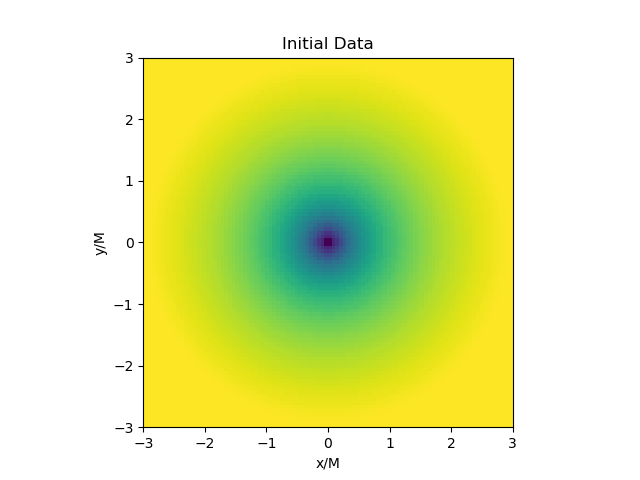

In [10]:
import numpy as np
from scipy.interpolate import griddata
from pylab import savefig
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import Image

x96,y96,valuesCF96,valuesHam96,valuesmomr96,valuesmomtheta96,valuesmomphi96 = np.loadtxt('out96.txt').T #Transposed for easier unpacking


pl_xmin = -3.
pl_xmax = +3.
pl_ymin = -3.
pl_ymax = +3.

grid_x, grid_y = np.mgrid[pl_xmin:pl_xmax:100j, pl_ymin:pl_ymax:100j]
points96 = np.zeros((len(x96), 2))
for i in range(len(x96)):
    points96[i][0] = x96[i]
    points96[i][1] = y96[i]

grid96 = griddata(points96, valuesCF96, (grid_x, grid_y), method='nearest')
grid96cub = griddata(points96, valuesCF96, (grid_x, grid_y), method='cubic')

plt.clf()
plt.title("Initial Data")
plt.xlabel("x/M")
plt.ylabel("y/M")

# fig, ax = plt.subplots()
#ax.plot(grid96cub.T, extent=(pl_xmin,pl_xmax, pl_ymin,pl_ymax))
plt.imshow(grid96.T, extent=(pl_xmin,pl_xmax, pl_ymin,pl_ymax))
savefig("ID.png")
plt.close()
Image("ID.png")
# #           interpolation='nearest', cmap=cm.gist_rainbow)

<a id='convergence'></a>

# Step 7: Validation: Convergence of numerical errors (Hamiltonian & momentum constraint violations) to zero \[Back to [top](#toc)\]
$$\label{convergence}$$

**Special thanks to George Vopal for creating the following plotting script.**

The equations behind these initial data solve Einstein's equations exactly, at a single instant in time. One reflection of this solution is that the Hamiltonian constraint violation should be exactly zero in the initial data. 

However, when evaluated on numerical grids, the Hamiltonian constraint violation will *not* generally evaluate to zero due to the associated numerical derivatives not being exact. However, these numerical derivatives (finite difference derivatives in this case) should *converge* to the exact derivatives as the density of numerical sampling points approaches infinity.

In this case, all of our finite difference derivatives agree with the exact solution, with an error term that drops with the uniform gridspacing to the fourth power: $\left(\Delta x^i\right)^4$. 

Here, as in the [Start-to-Finish Scalar Wave (Cartesian grids) NRPy+ tutorial](Tutorial-Start_to_Finish-ScalarWave.ipynb) and the [Start-to-Finish Scalar Wave (curvilinear grids) NRPy+ tutorial](Tutorial-Start_to_Finish-ScalarWaveCurvilinear.ipynb) we confirm this convergence.

First, let's take a look at what the numerical error looks like on the x-y plane at a given numerical resolution, plotting $\log_{10}|H|$, where $H$ is the Hamiltonian constraint violation:

<Figure size 432x288 with 0 Axes>

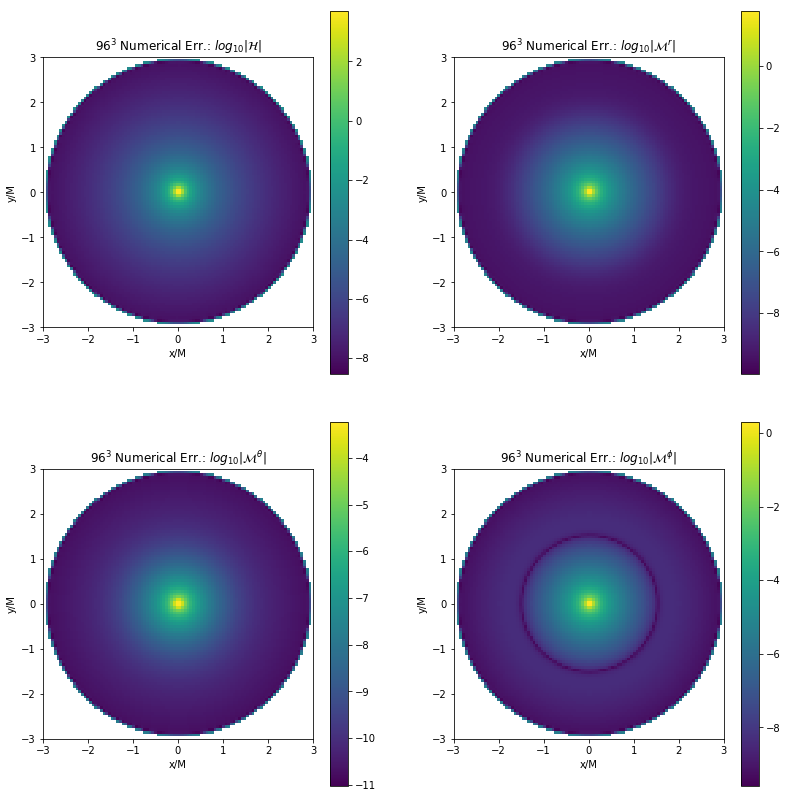

In [11]:
RefData=[valuesHam96,valuesmomr96,valuesmomtheta96,valuesmomphi96]
SubTitles=["\mathcal{H}",'\mathcal{M}^r',r"\mathcal{M}^{\theta}","\mathcal{M}^{\phi}"]
axN = [] #this will let us automate the subplots in the loop that follows
grid96N = [] #we need to calculate the grid96 data for each constraint for use later
plt.clf()

# We want to create four plots. One for the Hamiltonian, and three for the momentum
# constraints (r,th,ph)
# Define the size of the overall figure
fig = plt.figure(figsize=(12,12)) # 8 in x 8 in

num_plots = 4

if dictID[initial_data_string].EnableMomentum == False:
    num_plots = 1


for p in range(num_plots):
    grid96 = griddata(points96, RefData[p], (grid_x, grid_y), method='nearest')
    grid96N.append(grid96)
    grid96cub = griddata(points96, RefData[p], (grid_x, grid_y), method='cubic')

    #fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)


    #Generate the subplot for the each constraint
    ax = fig.add_subplot(221+p)
    axN.append(ax) # Grid of 2x2
    
    axN[p].set_xlabel('x/M')
    axN[p].set_ylabel('y/M')
    axN[p].set_title('$96^3$ Numerical Err.: $log_{10}|'+SubTitles[p]+'|$')

    fig96cub = plt.imshow(grid96cub.T, extent=(pl_xmin,pl_xmax, pl_ymin,pl_ymax))
    cb = plt.colorbar(fig96cub)
    
# Adjust the spacing between plots
plt.tight_layout(pad=4)

Next, we set up the same initial data but on a lower-resolution, $48^3$ grid. Since the constraint violation (numerical error associated with the fourth-order-accurate, finite-difference derivatives) should converge to zero with the uniform gridspacing to the fourth power: $\left(\Delta x^i\right)^4$, we expect the constraint violation will increase (relative to the $96^3$ grid) by a factor of $\left(96/48\right)^4$. Here we demonstrate that indeed this order of convergence is observed as expected. I.e., at all points *except* at the points immediately surrounding the coordinate center of the black hole (due to the spatial slice excising the physical singularity at this point through [the puncture method](http://gr.physics.ncsu.edu/UMD_June09.pdf)) exhibit numerical errors that drop as $\left(\Delta x^i\right)^4$.

<Figure size 432x288 with 0 Axes>

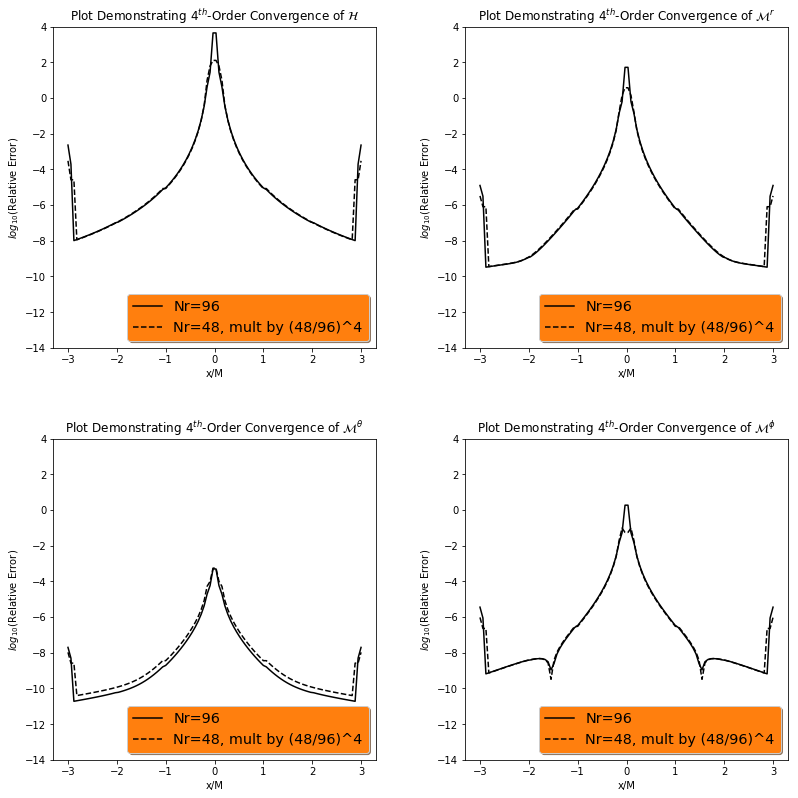

In [12]:
x48,y48,valuesCF48,valuesHam48,valuesmomr48,valuesmomtheta48,valuesmomphi48 = np.loadtxt('out48.txt').T #Transposed for easier unpacking
points48 = np.zeros((len(x48), 2))
for i in range(len(x48)):
    points48[i][0] = x48[i]
    points48[i][1] = y48[i]

RefData=[valuesHam48,valuesmomr48,valuesmomtheta48,valuesmomphi48]
SubTitles=["\mathcal{H}",'\mathcal{M}^r',r"\mathcal{M}^{\theta}","\mathcal{M}^{\phi}"]
axN = []
plt.clf()

# We want to create four plots. One for the Hamiltonian, and three for the momentum
# constrains (r,th,ph)
# Define the size of the overall figure
fig = plt.figure(figsize=(12,12)) # 8 in x 8 in

for p in range(num_plots): #loop to cycle through our constraints and plot the data
    grid48 = griddata(points48, RefData[p], (grid_x, grid_y), method='nearest')
    griddiff_48_minus_96 = np.zeros((100,100))
    griddiff_48_minus_96_1darray = np.zeros(100*100)
    gridx_1darray_yeq0 = np.zeros(100)
    grid48_1darray_yeq0 = np.zeros(100)
    grid96_1darray_yeq0 = np.zeros(100)
    count = 0
    for i in range(100):
        for j in range(100):
            griddiff_48_minus_96[i][j] = grid48[i][j] - grid96N[p][i][j]
            griddiff_48_minus_96_1darray[count] = griddiff_48_minus_96[i][j]
            if j==49:
                gridx_1darray_yeq0[i] = grid_x[i][j]
                grid48_1darray_yeq0[i] = grid48[i][j] + np.log10((48./96.)**4)
                grid96_1darray_yeq0[i] = grid96N[p][i][j]
            count = count + 1

    #Generate the subplot for the each constraint
    ax = fig.add_subplot(221+p)
    axN.append(ax) # Grid of 2x2
    axN[p].set_title('Plot Demonstrating $4^{th}$-Order Convergence of $'+SubTitles[p]+'$')
    axN[p].set_xlabel("x/M")
    axN[p].set_ylabel("$log_{10}$(Relative Error)")

    ax.plot(gridx_1darray_yeq0, grid96_1darray_yeq0, 'k-', label='Nr=96')
    ax.plot(gridx_1darray_yeq0, grid48_1darray_yeq0, 'k--', label='Nr=48, mult by (48/96)^4')
    ax.set_ylim([-14,4.])

    legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
    legend.get_frame().set_facecolor('C1')

# Adjust the spacing between plots
plt.tight_layout(pad=4)

<a id='latex_pdf_output'></a>

# Step 7: Output this module to $\LaTeX$-formatted PDF file \[Back to [top](#toc)\]
$$\label{latex_pdf_output}$$

The following code cell converts this Jupyter notebook into a proper, clickable $\LaTeX$-formatted PDF file. After the cell is successfully run, the generated PDF may be found in the root NRPy+ tutorial directory, with filename
[Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data.pdf](Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data.pdf) (Note that clicking on this link may not work; you may need to open the PDF file through another means.)

In [13]:
!jupyter nbconvert --to latex --template latex_nrpy_style.tplx Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data.ipynb
!pdflatex -interaction=batchmode Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data.tex
!pdflatex -interaction=batchmode Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data.tex
!pdflatex -interaction=batchmode Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data.tex
!rm -f Tut*.out Tut*.aux Tut*.log

[NbConvertApp] Converting notebook Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data.ipynb to latex
[NbConvertApp] Support files will be in Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data_files/
[NbConvertApp] Making directory Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data_files
[NbConvertApp] Making directory Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data_files
[NbConvertApp] Writing 90752 bytes to Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data.tex
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
